In [1]:
# Mount Google Drive (optional)
from google.colab import drive
drive.mount('/content/drive')

# Kaggle setup
!pip install -q kaggle
from google.colab import files
files.upload()  # Upload kaggle.json

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download dataset
!kaggle datasets download -d warcoder/mango-leaf-disease-dataset
!unzip -q mango-leaf-disease-dataset.zip -d mango_dataset


Mounted at /content/drive


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/warcoder/mango-leaf-disease-dataset
License(s): Attribution 4.0 International (CC BY 4.0)


In [2]:
import cv2
import os
import numpy as np
from tqdm import tqdm
from PIL import Image

def enhance_image(img_path):
    img = cv2.imread(img_path)
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

    # Color correction via CLAHE
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
    cl = clahe.apply(l)
    lab = cv2.merge((cl, a, b))
    enhanced = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)

    # Edge enhancement (unsharp masking)
    gaussian = cv2.GaussianBlur(enhanced, (9,9), 10.0)
    sharpened = cv2.addWeighted(enhanced, 1.5, gaussian, -0.5, 0)

    return sharpened

# Enhance and save to new directory
import shutil
input_dir = '/content/mango_dataset/MangoLeafBD Dataset'
output_dir = '/content/enhanced dataset'
shutil.copytree(input_dir, output_dir, dirs_exist_ok=True)

for cls in os.listdir(output_dir):
    for img_name in tqdm(os.listdir(os.path.join(output_dir, cls)), desc=cls):
        img_path = os.path.join(output_dir, cls, img_name)
        enhanced = enhance_image(img_path)
        cv2.imwrite(img_path, enhanced)


Sooty Mould: 100%|██████████| 500/500 [00:02<00:00, 219.35it/s]


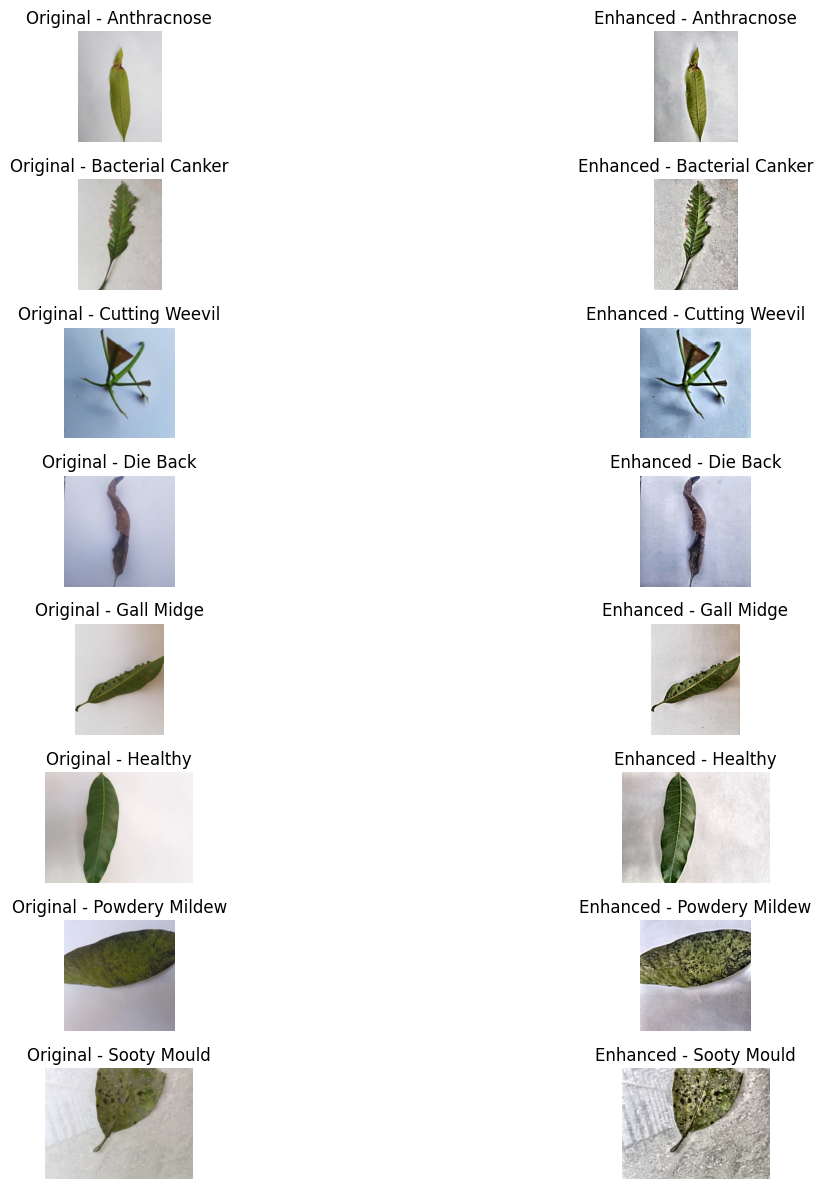

In [3]:
import matplotlib.pyplot as plt

def show_original_vs_enhanced(original_dir, enhanced_dir, class_names):
    plt.figure(figsize=(16, 12))
    for i, cls in enumerate(class_names):
        # Pick the first image from each class
        original_img_path = os.path.join(original_dir, cls, os.listdir(os.path.join(original_dir, cls))[0])
        enhanced_img_path = os.path.join(enhanced_dir, cls, os.listdir(os.path.join(enhanced_dir, cls))[0])

        original = cv2.imread(original_img_path)
        enhanced = cv2.imread(enhanced_img_path)

        original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
        enhanced = cv2.cvtColor(enhanced, cv2.COLOR_BGR2RGB)

        # Show original
        plt.subplot(len(class_names), 2, 2 * i + 1)
        plt.imshow(original)
        plt.title(f"Original - {cls}")
        plt.axis('off')

        # Show enhanced
        plt.subplot(len(class_names), 2, 2 * i + 2)
        plt.imshow(enhanced)
        plt.title(f"Enhanced - {cls}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Define paths and class names
original_dir = '/content/mango_dataset/MangoLeafBD Dataset'
enhanced_dir = '/content/enhanced dataset'
class_names = sorted(os.listdir(original_dir))  # ['Anthracnose', 'Bacterial Canker', ..., 'Healthy']

# Display side-by-side samples
show_original_vs_enhanced(original_dir, enhanced_dir, class_names)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 4.6 MB/s eta 0:00:00

📦 Training on Enhanced Dataset
Found 3200 images belonging to 8 classes.
Found 800 images belonging to 8 classes.
16804768/16804768 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 84s 620ms/step - accuracy: 0.7834 - loss: 0.6503 - val_accuracy: 0.9388 - val_loss: 0.1709 - learning_rate: 0.0010
Epoch 2/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 48s 477ms/step - accuracy: 0.9727 - loss: 0.0920 - val_accuracy: 0.9500 - val_loss: 0.1186 - learning_rate: 0.0010
Epoch 3/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 47s 467ms/step - accuracy: 0.9738 - loss: 0.0786 - val_accuracy: 0.9725 - val_loss: 0.0759 - learning_rate: 0.0010
Epoch 4/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 49s 486ms/step - accuracy: 0.9857 - loss: 0.0438 - val_accuracy: 0.9800 - val_loss: 0.0544 - learning_rate: 0.0010
Epoch 5/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 45s 448ms/step - accuracy: 0.9851 - loss: 0.0446 - val_accuracy: 0.9787 - val_loss: 0.0589 - learning_rate: 0.0010
Epoch 6/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 46s 462ms/step - accuracy: 0.9945 - loss: 0.0197 - val_accuracy: 0.9825 - val_loss: 0.0472 - learning_rate: 0.0010
Epoch 7/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 81s 449ms/step - accuracy: 0.9

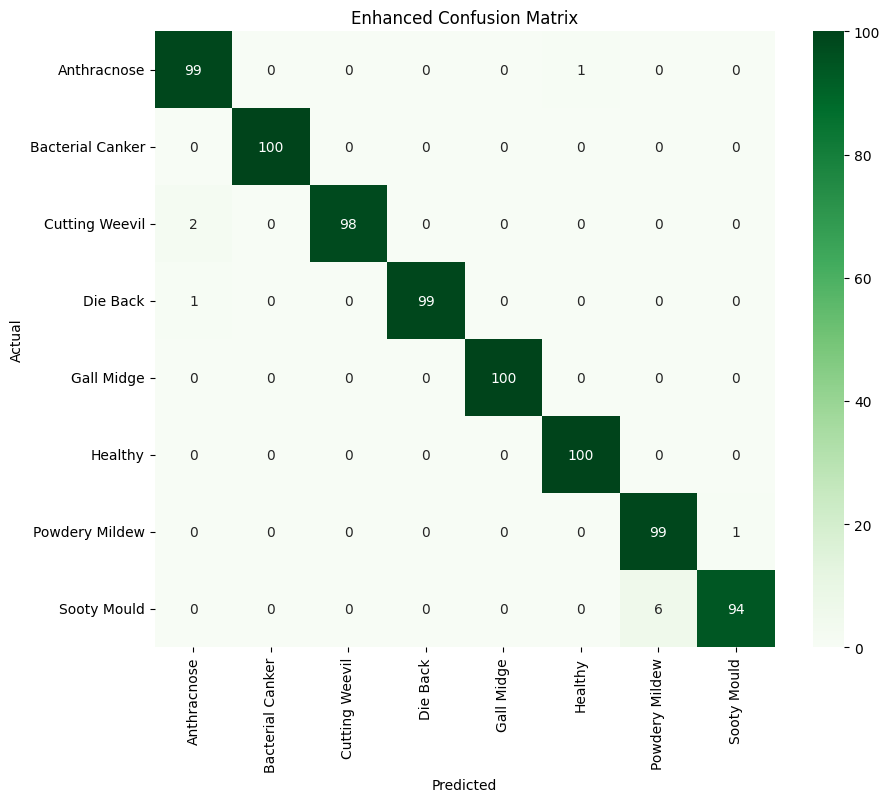

NameError: name 'y_true_orig' is not defined

In [4]:
# --- Install EfficientNet ---
!pip install -q efficientnet

# --- Imports ---
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import efficientnet.tfkeras as efn
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

# --- Parameters ---
img_size = (224, 224)
batch_size = 32
num_classes = 8
seed = 42
epochs = 15

# --- Common Function to Train and Evaluate ---
def train_and_evaluate(dataset_path, label="Original"):
    print(f"\n📦 Training on {label} Dataset")

    # Data generators
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        validation_split=0.2,
        rotation_range=20,
        zoom_range=0.2,
        shear_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=[0.8, 1.2]
    )

    val_datagen = ImageDataGenerator(
        rescale=1./255,
        validation_split=0.2
    )

    train_gen = train_datagen.flow_from_directory(
        dataset_path,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True,
        subset='training',
        seed=seed
    )

    val_gen = val_datagen.flow_from_directory(
        dataset_path,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False,
        subset='validation',
        seed=seed
    )

    class_names = list(train_gen.class_indices.keys())

    # Model
    base_model = efn.EfficientNetB0(input_shape=img_size + (3,), include_top=False, weights='imagenet', pooling='avg')
    base_model.trainable = False

    model = tf.keras.Sequential([
        base_model,
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True),
        tf.keras.callbacks.ReduceLROnPlateau(patience=3, factor=0.2, min_lr=1e-6)
    ]

    history = model.fit(
        train_gen,
        validation_data=val_gen,
        epochs=epochs,
        callbacks=callbacks,
        verbose=1
    )

    # Evaluation
    val_gen.reset()
    y_pred = model.predict(val_gen)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = val_gen.classes

    print(f"\n📊 Classification Report - {label} Dataset:\n")
    print(classification_report(y_true, y_pred_classes, target_names=class_names))

    cm = confusion_matrix(y_true, y_pred_classes)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=class_names, yticklabels=class_names)
    plt.title(f"{label} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    return history, y_true, y_pred_classes, class_names



# --- Train on Enhanced ---
enhanced_path = "/content/enhanced dataset"
history_enh, y_true_enh, y_pred_enh, _ = train_and_evaluate(enhanced_path, "Enhanced")

# --- Compare F1-Scores ---
from sklearn.metrics import f1_score

f1_enh = f1_score(y_true_enh, y_pred_enh, average=None)

x = np.arange(len(class_names))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, f1_orig, width, label='Original')
plt.bar(x + width/2, f1_enh, width, label='Enhanced')
plt.xticks(x, class_names, rotation=45)
plt.title("Class-wise F1 Score Comparison")
plt.ylabel("F1 Score")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Rebuild the model using same structure (if not already in memory)
base_model = efn.EfficientNetB0(input_shape=img_size + (3,), include_top=False, weights='imagenet', pooling='avg')
base_model.trainable = False

model_enhanced = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compile to prepare for saving
model_enhanced.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Load trained weights from the last training session
model_enhanced.set_weights(history_enh.model.get_weights())

# Save the full model to disk
model_enhanced.save("/content/mango_disease_classifier_enhanced.h5")
print("✅ Enhanced model saved successfully.")


In [ ]:
# Load the saved model
model_enhanced = tf.keras.models.load_model("/content/mango_disease_classifier_enhanced.h5")
print("✅ Model loaded successfully.")


In [ ]:
from tensorflow.keras.preprocessing import image

def prepare_image(img_path, img_size=(224, 224)):
    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Rescale image
    return img_array

# Example: Load and preprocess a test image
img_path = '/content/mango_dataset/MangoLeafBD Dataset/Die Back/20211129_160425 (Custom).jpg'  # Replace with your image path
test_img = prepare_image(img_path)


In [ ]:
# Predict the class of the test image
predictions = model_enhanced.predict(test_img)
predicted_class = np.argmax(predictions, axis=1)

# Display the predicted class
print(f"Predicted class: {class_names[predicted_class[0]]}")
